# First neural network in tensorflow

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
n_features = 10
n_dense_neurons = 3

In [0]:
x = tf.placeholder(tf.float32, (None, n_features))

In [4]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
xW = tf.matmul(x,W)

In [0]:
z = tf.add(xW, b)

In [0]:
a = tf.sigmoid(z)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict = {x:np.random.random([1, n_features])})

In [12]:
print(layer_out)

[[0.7041551  0.28945047 0.702909  ]]


## Simple backpropogation

### Simple regression model

In [14]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([-0.25451772,  0.59542516,  1.3567963 ,  2.42929401,  4.67023256,
        4.48945683,  7.46960801,  7.53126198,  8.67824582,  9.69299956])

In [15]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([0.99510388, 0.49141994, 1.33247814, 2.66245067, 4.54570324,
       5.83380534, 7.74389051, 6.89470774, 8.85642384, 9.15480725])

In [0]:
import matplotlib.pyplot as plt

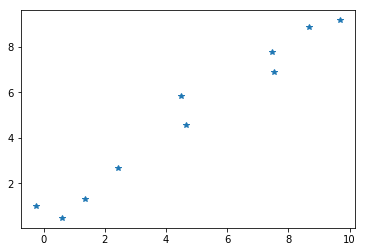

In [18]:
plt.plot(x_data, y_label, '*')
plt.show()

y = mx + b

In [19]:
np.random.rand(2)

array([0.17180677, 0.74997632])

In [0]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [0]:
error = 0

# Cost function
for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    
    error += (y - y_hat)**2

In [0]:
# Optimizer function
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m, b])

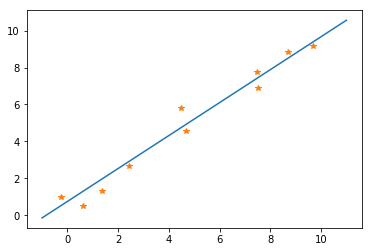

In [29]:
x_test = np.linspace(-1, 11, 10)

# y = mx + b
y_pred = final_slope * x_test + final_intercept

plt.plot(x_test, y_pred)
plt.plot(x_data, y_label, '*')
plt.show()